In [51]:
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import getpass  
import matplotlib.pyplot as plt
import seaborn as sns
password = getpass.getpass()


········


In [358]:
# get the data
connection_string = 'mysql+pymysql://root:' + password + '@localhost/sakila'
engine = create_engine(connection_string)
query = '''SELECT f.title, f.film_id, r.customer_id, r.staff_id, True as rented
FROM sakila.film f
LEFT JOIN sakila.inventory i USING (film_id)
LEFT JOIN sakila.rental r USING (inventory_id)
WHERE date_format(CONVERT(left(r.rental_date,10), DATE), '%%m')=8 AND date_format(CONVERT(left(r.rental_date,10), DATE), '%%Y')=2005
GROUP BY f.title
'''
rented_films = pd.read_sql_query(query, engine)
rented_films.head()

,title,film_id,customer_id,staff_id,rented
0,ACADEMY DINOSAUR,1,518,1,1
1,ACE GOLDFINGER,2,271,2,1
2,ADAPTATION HOLES,3,417,2,1
3,AFFAIR PREJUDICE,4,560,2,1
4,AFRICAN EGG,5,566,1,1


In [359]:
all_films = pd.read_sql_query("SELECT * FROM film", engine)
all_films.head()

,film_id,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update
0,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,None,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",2006-02-15 05:03:42
1,2,ACE GOLDFINGER,A Astounding Epistle of a Database Administrat...,2006,1,None,3,4.99,48,12.99,G,"Trailers,Deleted Scenes",2006-02-15 05:03:42
2,3,ADAPTATION HOLES,A Astounding Reflection of a Lumberjack And a ...,2006,1,None,7,2.99,50,18.99,NC-17,"Trailers,Deleted Scenes",2006-02-15 05:03:42
3,4,AFFAIR PREJUDICE,A Fanciful Documentary of a Frisbee And a Lumb...,2006,1,None,5,2.99,117,26.99,G,"Commentaries,Behind the Scenes",2006-02-15 05:03:42
4,5,AFRICAN EGG,A Fast-Paced Documentary of a Pastry Chef And ...,2006,1,None,6,2.99,130,22.99,G,Deleted Scenes,2006-02-15 05:03:42


In [360]:
# I have two diferent dataframes: 1 with all the films and 1 with the films rented. I merge both
all_films = all_films.merge(rented_films, on='film_id', how="left")
all_films.head()

,film_id,title_x,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update,title_y,customer_id,staff_id,rented
0,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,None,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",2006-02-15 05:03:42,ACADEMY DINOSAUR,518.0,1.0,1.0
1,2,ACE GOLDFINGER,A Astounding Epistle of a Database Administrat...,2006,1,None,3,4.99,48,12.99,G,"Trailers,Deleted Scenes",2006-02-15 05:03:42,ACE GOLDFINGER,271.0,2.0,1.0
2,3,ADAPTATION HOLES,A Astounding Reflection of a Lumberjack And a ...,2006,1,None,7,2.99,50,18.99,NC-17,"Trailers,Deleted Scenes",2006-02-15 05:03:42,ADAPTATION HOLES,417.0,2.0,1.0
3,4,AFFAIR PREJUDICE,A Fanciful Documentary of a Frisbee And a Lumb...,2006,1,None,5,2.99,117,26.99,G,"Commentaries,Behind the Scenes",2006-02-15 05:03:42,AFFAIR PREJUDICE,560.0,2.0,1.0
4,5,AFRICAN EGG,A Fast-Paced Documentary of a Pastry Chef And ...,2006,1,None,6,2.99,130,22.99,G,Deleted Scenes,2006-02-15 05:03:42,AFRICAN EGG,566.0,1.0,1.0


In [361]:
# films that haven't been rented have NaN values
all_films['rented'].value_counts(dropna=False)

1.0    958
NaN     42
Name: rented, dtype: int64

In [362]:
# I fill those values with 0
all_films['rented'].fillna(0, inplace=True)
all_films['rented'].value_counts(dropna=False)

1.0    958
0.0     42
Name: rented, dtype: int64

In [363]:
all_films.dtypes

film_id                          int64
title_x                         object
description                     object
release_year                     int64
language_id                      int64
original_language_id            object
rental_duration                  int64
rental_rate                    float64
length                           int64
replacement_cost               float64
rating                          object
special_features                object
last_update             datetime64[ns]
title_y                         object
customer_id                    float64
staff_id                       float64
rented                         float64
dtype: object

In [364]:
# I convert the column to boolean
all_films['rented'] = all_films['rented'].astype('bool')
all_films['rented'].value_counts(dropna=False)

True     958
False     42
Name: rented, dtype: int64

In [365]:
all_films.dtypes

film_id                          int64
title_x                         object
description                     object
release_year                     int64
language_id                      int64
original_language_id            object
rental_duration                  int64
rental_rate                    float64
length                           int64
replacement_cost               float64
rating                          object
special_features                object
last_update             datetime64[ns]
title_y                         object
customer_id                    float64
staff_id                       float64
rented                            bool
dtype: object

In [366]:
# I drop some irrelevant columns

#all_films = all_films.drop(['film_id','description', 'title_y', 'title_x', 'last_update', 'release_year', 'language_id'], axis=1)

# I have done all the process including the staff_id column and I get a score=1.0. 
# Without this column the final score=0.965
all_films = all_films.drop(['staff_id','film_id','description', 'title_y', 'title_x', 'last_update', 'release_year', 'language_id'], axis=1)
all_films.head()

,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,customer_id,rented
0,None,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",518.0,True
1,None,3,4.99,48,12.99,G,"Trailers,Deleted Scenes",271.0,True
2,None,7,2.99,50,18.99,NC-17,"Trailers,Deleted Scenes",417.0,True
3,None,5,2.99,117,26.99,G,"Commentaries,Behind the Scenes",560.0,True
4,None,6,2.99,130,22.99,G,Deleted Scenes,566.0,True


In [367]:
# Looking for NaN
all_films.isna().sum()

original_language_id    1000
rental_duration            0
rental_rate                0
length                     0
replacement_cost           0
rating                     0
special_features           0
customer_id               42
rented                     0
dtype: int64

In [368]:
all_films.describe().T

,count,mean,std,min,25%,50%,75%,max
rental_duration,1000.0,4.985000,1.411654,3.00,4.00,5.00,6.00,7.00
rental_rate,1000.0,2.980000,1.646393,0.99,0.99,2.99,4.99,4.99
length,1000.0,115.272000,40.426332,46.00,80.00,114.00,149.25,185.00
replacement_cost,1000.0,19.984000,6.050833,9.99,14.99,19.99,24.99,29.99
customer_id,958.0,290.196242,171.668672,1.00,144.00,284.50,434.75,599.00


In [369]:
# I drop original_language_id because there are only NaN values. 
# The customer_id column has 42 NaN, just the films that haven't been rented. I fill with 0.
all_films = all_films.drop(['original_language_id'], axis=1)
all_films['customer_id'].fillna(0, inplace=True)
#all_films['staff_id'].fillna(0, inplace=True)

In [370]:
all_films.describe(include=object).T

,count,unique,top,freq
rating,1000,5,PG-13,223
special_features,1000,15,"Trailers,Commentaries,Behind the Scenes",79


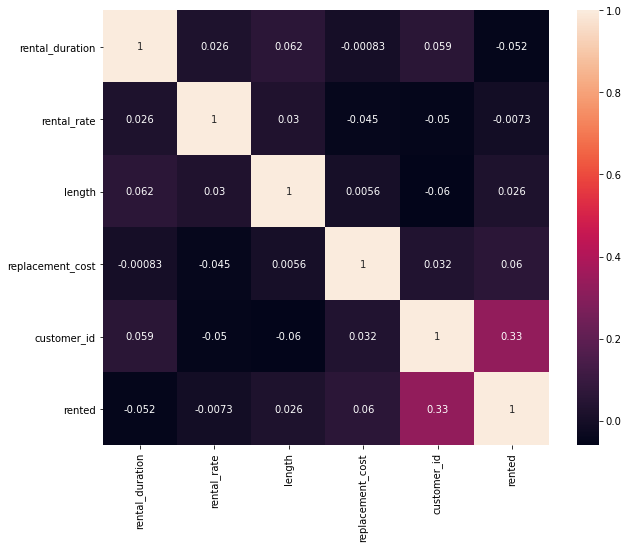

In [371]:
# There is no big correlation between variables and target
corr_matrix = all_films.corr()
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [372]:
# I do the train-test-split BEFORE I apply transformations, 
# then train transformation on training set only
y = all_films['rented']
X = all_films.drop('rented', axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=137)

In [373]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

X_train_num = X_train.select_dtypes(include = np.number)

# Scaling data
transformer = MinMaxScaler().fit(X_train_num) # need to keep transformer
X_train_normalized = transformer.transform(X_train_num)
X_train_norm = pd.DataFrame(X_train_normalized)

In [374]:
X_train_norm.columns = X_train_num.columns
X_train_norm.head()

,rental_duration,rental_rate,length,replacement_cost,customer_id
0,1.00,1.0,0.172662,0.90,0.496656
1,1.00,1.0,0.129496,0.25,0.724080
2,0.75,0.5,0.280576,0.05,0.214047
3,0.50,1.0,0.532374,0.95,0.613712
4,0.25,0.5,0.129496,0.00,0.884615


In [375]:
X_train_categorical = X_train.select_dtypes(include = object)
X_train_cat = pd.get_dummies(X_train_categorical, 
                             columns=['rating', 'special_features'],
                             drop_first=True)
X_train_cat.head()

,rating_NC-17,rating_PG,rating_PG-13,rating_R,special_features_Commentaries,"special_features_Commentaries,Behind the Scenes","special_features_Commentaries,Deleted Scenes","special_features_Commentaries,Deleted Scenes,Behind the Scenes",special_features_Deleted Scenes,"special_features_Deleted Scenes,Behind the Scenes",special_features_Trailers,"special_features_Trailers,Behind the Scenes","special_features_Trailers,Commentaries","special_features_Trailers,Commentaries,Behind the Scenes","special_features_Trailers,Commentaries,Deleted Scenes","special_features_Trailers,Commentaries,Deleted Scenes,Behind the Scenes","special_features_Trailers,Deleted Scenes","special_features_Trailers,Deleted Scenes,Behind the Scenes"
164,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
910,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
21,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
169,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
571,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [376]:
# build X_train and y_train
X_train_transformed = np.concatenate([X_train_norm, X_train_cat], axis=1)

In [377]:
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression(random_state=0, solver='saga',
                  multi_class='multinomial').fit(X_train_transformed, y_train)

In [378]:
# Transformations on the X_test as well
# for numericals
X_test_num = X_test.select_dtypes(include = np.number)

# Scaling data
# I use the transformer that was trained on the training data
X_test_normalized = transformer.transform(X_test_num)
X_test_norm = pd.DataFrame(X_test_normalized)

In [379]:
# for categoricals
X_test_categorical = X_test.select_dtypes(include = object)
X_test_cat = pd.get_dummies(X_test_categorical, 
                            columns=['rating', 'special_features'],
                            drop_first=True)
# verify that dummies columns are in the same order and that the same column was dropped
display(list(zip(list(X_train_cat.columns),list(X_test_cat.columns))))
X_test_cat.head()

[('rating_NC-17', 'rating_NC-17'),
 ('rating_PG', 'rating_PG'),
 ('rating_PG-13', 'rating_PG-13'),
 ('rating_R', 'rating_R'),
 ('special_features_Commentaries', 'special_features_Commentaries'),
 ('special_features_Commentaries,Behind the Scenes',
  'special_features_Commentaries,Behind the Scenes'),
 ('special_features_Commentaries,Deleted Scenes',
  'special_features_Commentaries,Deleted Scenes'),
 ('special_features_Commentaries,Deleted Scenes,Behind the Scenes',
  'special_features_Commentaries,Deleted Scenes,Behind the Scenes'),
 ('special_features_Deleted Scenes', 'special_features_Deleted Scenes'),
 ('special_features_Deleted Scenes,Behind the Scenes',
  'special_features_Deleted Scenes,Behind the Scenes'),
 ('special_features_Trailers', 'special_features_Trailers'),
 ('special_features_Trailers,Behind the Scenes',
  'special_features_Trailers,Behind the Scenes'),
 ('special_features_Trailers,Commentaries',
  'special_features_Trailers,Commentaries'),
 ('special_features_Trailer

,rating_NC-17,rating_PG,rating_PG-13,rating_R,special_features_Commentaries,"special_features_Commentaries,Behind the Scenes","special_features_Commentaries,Deleted Scenes","special_features_Commentaries,Deleted Scenes,Behind the Scenes",special_features_Deleted Scenes,"special_features_Deleted Scenes,Behind the Scenes",special_features_Trailers,"special_features_Trailers,Behind the Scenes","special_features_Trailers,Commentaries","special_features_Trailers,Commentaries,Behind the Scenes","special_features_Trailers,Commentaries,Deleted Scenes","special_features_Trailers,Commentaries,Deleted Scenes,Behind the Scenes","special_features_Trailers,Deleted Scenes","special_features_Trailers,Deleted Scenes,Behind the Scenes"
275,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
65,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
210,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
416,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
422,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [380]:
X_test_transformed = np.concatenate([X_test_norm, X_test_cat], axis=1)

In [381]:
# Now we can make predictions on the test set:
predictions = classification.predict(X_test_transformed)
# classification was train in the train-set and now I apply it on the test-set
classification.score(X_test_transformed, y_test)


0.965

In [382]:
print(y_test.value_counts())

True     193
False      7
Name: rented, dtype: int64


In [383]:
pd.Series(predictions).value_counts()

True    200
dtype: int64

In [384]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[  0,   7],
       [  0, 193]], dtype=int64)